## Confusion Matrix of Iris Dataset using NCM

분류 모델의 성능을 측정하기 위한 confusion matrix

실제 타겟의 값을 분류 모델을 통해 예측한 값과 비교

Confusion matrix를 통해 분류 모델의 성능을 확인할 수 있으며, 어떤 종류의 오류가 발생하는지 확인 가능

<span style="color: #2D3748; background-color:#fff5b1;">Test size 0.2로 10번 반복 실험한 결과 setosa에 대한 분류는 잘 하지만 versicolor와 virginica를 잘못 분류하는 경우가 발생하였다.</span>

<span style="color: #2D3748; background-color:#fff5b1;">반복 실험 동안 계속 잘 못 분류되는 데이터를 분석한 결과 virginica label을 가진 데이터가 versicolor 데이터 특징과 거의 동일하기 때문에 분류하지 못하였다.</span>

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import NearestCentroid

dict_items([((6.8, 2.8, 4.8, 1.4, 1.0), 2), ((5.6, 2.8, 4.9, 2.0, 2.0), 1), ((6.2, 2.8, 4.8, 1.8, 2.0), 2), ((6.7, 3.0, 5.0, 1.7, 1.0), 3), ((5.7, 2.5, 5.0, 2.0, 2.0), 3), ((6.0, 2.7, 5.1, 1.6, 1.0), 1), ((6.1, 3.0, 4.9, 1.8, 2.0), 1), ((6.0, 2.2, 5.0, 1.5, 2.0), 3), ((4.9, 2.5, 4.5, 1.7, 2.0), 2), ((6.9, 3.1, 4.9, 1.5, 1.0), 2), ((6.0, 3.0, 4.8, 1.8, 2.0), 1), ((7.0, 3.2, 4.7, 1.4, 1.0), 1)])


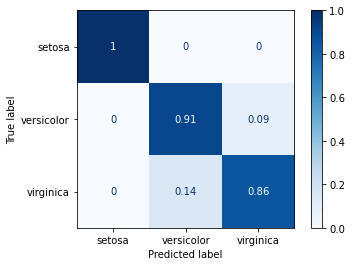

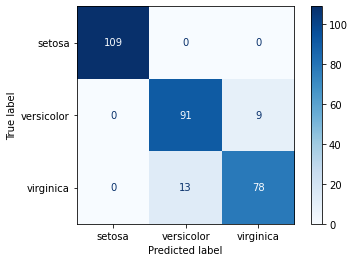

In [4]:
from collections import Counter

iris = load_iris()

max_seed = 10

predict_list = []
label_list = []
error_value = []
error = []

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=seed, shuffle=True)

    nc = NearestCentroid()
    nc.fit(x_train, y_train)
    predict = nc.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    equal = np.equal(predict, y_test)
    idx = np.where(equal == False)
    if len(idx[0]) != 0:
        for idx in idx[0]:
            values = x_test[idx]
            values = np.append(values, y_test[idx])
            error_value.append(values)

error_value = np.array(error_value)
counter = Counter(map(tuple, error_value.tolist()))

max_list = list(counter.values())
max_count = np.max(max_list)

for key, value in counter.items():
    if value == max_count:
        error.append(key)

cm = confusion_matrix(label_list, predict_list, labels=nc.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=nc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)

In [5]:
from scipy.spatial.distance import euclidean

k = 5

for data in error:
    dist_arr = []
    print("Error data value : ", data[:4], " / label : ", int(data[-1]))
    
    for idx, data in enumerate(iris.data):
        data = data.reshape(1, -1)
        dist = euclidean(data[:4], data)
        dist_arr.append(dist)
    
    dist = np.argsort(dist_arr)[:k]
    for s, d in enumerate(dist):
        print(s+1, "th close distance : ", x_train[d], " / label : ", y_train[d])
    print("-----" * 11)

Error data value :  (6.7, 3.0, 5.0, 1.7)  / label :  1
1 th close distance :  [6.8 3.  5.5 2.1]  / label :  2
2 th close distance :  [6.5 3.  5.8 2.2]  / label :  2
3 th close distance :  [6.1 2.9 4.7 1.4]  / label :  1
4 th close distance :  [5.  3.3 1.4 0.2]  / label :  0
5 th close distance :  [6.3 2.5 5.  1.9]  / label :  2
-------------------------------------------------------
Error data value :  (5.7, 2.5, 5.0, 2.0)  / label :  2
1 th close distance :  [6.8 3.  5.5 2.1]  / label :  2
2 th close distance :  [6.5 3.  5.8 2.2]  / label :  2
3 th close distance :  [6.1 2.9 4.7 1.4]  / label :  1
4 th close distance :  [5.  3.3 1.4 0.2]  / label :  0
5 th close distance :  [6.3 2.5 5.  1.9]  / label :  2
-------------------------------------------------------
Error data value :  (6.0, 2.2, 5.0, 1.5)  / label :  2
1 th close distance :  [6.8 3.  5.5 2.1]  / label :  2
2 th close distance :  [6.5 3.  5.8 2.2]  / label :  2
3 th close distance :  [6.1 2.9 4.7 1.4]  / label :  1
4 th clo

## Nearest Centroid Classifier

train size :  120  / test size :  30

Training set score: 0.941667
Test set score: 0.900000
Training Time : 0.0005 sec


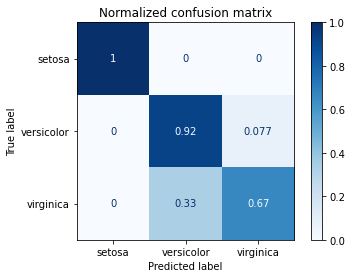

In [40]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()